# **Feature Selection and Feature Importance**

In [1]:
import time
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.linear_model import LinearRegression

# import helperfunctions
from helperfunctions_models import fun_load_file, fun_preprocessing, fun_split_X_y
from helperfunctions_models import fun_convert_time, fun_fit_gridsearch_time
from helperfunctions_models import fun_train_score, fun_test_score, fun_best_model
from helperfunctions_models import plot_feature_importances

# start time count and load data
start_script = time.time()
data = fun_load_file(subfolder_path='..\\01_data\\01_TSP', name='tsp_instances_j_updated.xlsx')
train_data = fun_preprocessing(data)
X, y = fun_split_X_y(train_data)

# create a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# save number of features and train sizes
n_features = X_train.shape[1]
train_size = f'{int(np.round(100 * len(X_train)/len(X)))} %'

### **1. Univariate statistics**

**Univariate Statistical Test:**<br>
The score is derived from a univariate statistical test that evaluates each feature independently against the target variable.

- F-test in f_regression:<br>
    The F-test assesses the linear relationship between each feature and the target variable.<br>
    The test calculates the F-statistic for each feature, which is the ratio of explained variance to unexplained variance.

    Explained Variance: The variance in the target variable that can be explained by the feature.<br>
    Unexplained Variance: The variance in the target variable that remains unexplained by the feature.<br>
    -> A higher F-statistic indicates a stronger relationship between the feature and the target variable.<br>

- P-value:<br>
    Alongside the F-statistic, a p-value is computed to determine the statistical significance of the observed relationship.<br>
    The p-value indicates the probability of observing the computed F-statistic.

In [2]:
# Step 4: Perform univariate feature selection (with SelectKBest or SelectPercentile)
select = SelectKBest(k=16, score_func=f_regression)
#select = SelectPercentile(percentile=50, score_func=f_regression)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

# Show names of selected and not selected features
selected_features = select.get_feature_names_out()
dropped_features = np.array(X_train.columns[~select.get_support()])
print('\nSelected features:\n', selected_features)
print('\nNot selected features:\n', dropped_features)

X_train.shape: (67500, 56)
X_train_selected.shape: (67500, 16)

Selected features:
 ['Depot Distance' '2nd CCD' '3rd CCD' '4th CCD'
 'Mean Distance To Other Customers' 'Gravity Center Distance'
 'Centroid Distance To Depot' 'Savings' 'Marginal Costs'
 'Depot Distance Ratio' '4th CCD Ratio'
 'Mean Distance To Other Customers Ratio' 'Gravity Center Distance Ratio'
 'Centroid Distance To Depot Ratio' 'Savings Ratio' 'Marginal Costs Ratio']

Not selected features:
 ['Instance ID' 'Number Customers' 'X' 'Y' 'X Depot' 'Y Depot'
 'Closest Customer Distance (CCD)' 'Cluster' 'Core Point' 'Outlier'
 'Number Clusters' 'Number Outliers' 'Cluster Size' 'X Centroid'
 'Y Centroid' 'Centroid Distance' 'Distance To Closest Other Cluster'
 'Distance To Closest Other Centroid' 'Cluster Area' 'Cluster Density'
 'X Mean' 'Y Mean' 'X Std' 'Y Std' 'X Max' 'Y Max' 'X Min' 'Y Min'
 'Correlation' 'Skewness X' 'Skewness Y' 'Total Costs'
 'Closest Customer Distance (CCD) Ratio' '2nd CCD Ratio' '3rd CCD Ratio'
 'C

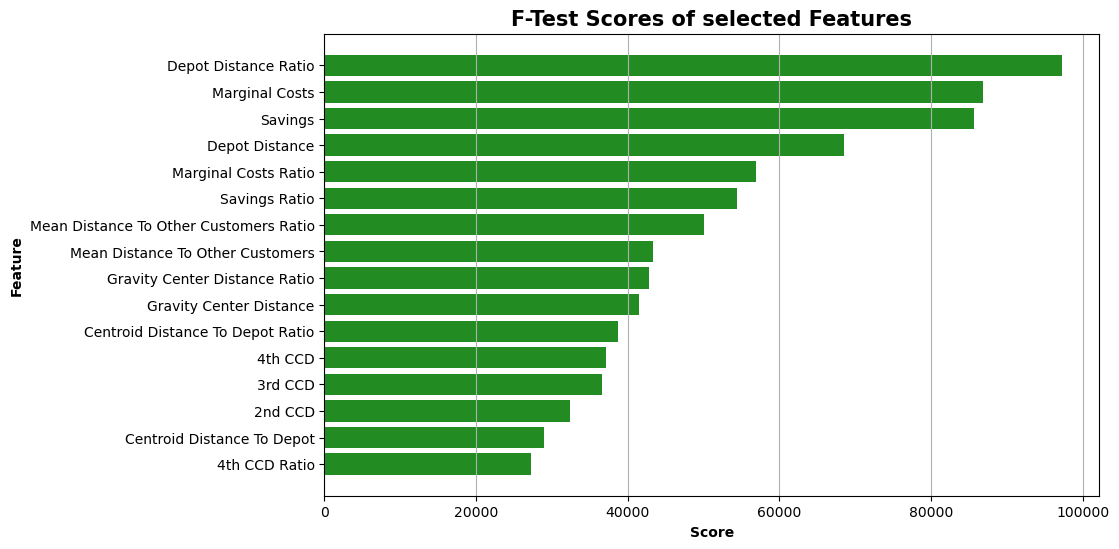

,Depot Distance,2nd CCD,3rd CCD,4th CCD,Mean Distance To Other Customers,Gravity Center Distance,Centroid Distance To Depot,Savings,Marginal Costs,Depot Distance Ratio,4th CCD Ratio,Mean Distance To Other Customers Ratio,Gravity Center Distance Ratio,Centroid Distance To Depot Ratio,Savings Ratio,Marginal Costs Ratio
69677,74.382412,11.977744,39.997353,54.165422,51.961210,37.249739,75.853165,4.577470,4.577470,1.436450,1.338558,1.006776,0.998140,1.574933,0.788739,0.777717
34646,25.187236,24.128578,26.210727,30.255220,36.505248,25.686423,12.202383,2.911537,2.911537,0.970934,0.877585,0.980556,0.998254,0.755477,0.349309,0.342628
86125,59.381098,41.508458,51.034661,54.656432,68.426798,56.456348,54.652977,14.062999,18.526416,1.313578,1.352400,1.221112,1.457002,1.280787,1.608183,1.532811
82264,24.713368,17.435241,22.752606,42.408433,57.444244,47.800608,27.018802,21.953203,22.779835,0.585547,1.183157,1.148622,1.394605,0.742998,1.989725,1.674071
53677,25.307497,20.672112,23.494538,29.873365,47.786737,34.065210,32.783466,5.467586,5.467586,0.480132,0.731426,0.908896,0.941747,0.632328,0.417114,0.388802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,39.409196,17.933495,28.809265,38.139905,36.320884,14.956833,31.494538,6.300977,6.300977,0.882335,0.858811,0.748210,0.465359,0.762884,0.438295,0.385324
45891,34.752013,21.530891,24.221070,24.661004,37.724362,8.474908,18.559626,18.449769,18.449769,0.794361,0.619172,0.735322,0.245055,0.492847,1.736072,1.469491
42613,74.887159,33.682718,35.668402,64.571275,61.856958,45.794846,48.070569,25.877118,25.877118,1.159858,1.275735,1.053047,1.129548,0.770356,2.415922,2.330522
43567,91.367357,17.349100,23.169903,28.555908,50.318028,39.835148,69.965495,12.209419,12.209419,1.536806,0.723371,1.021288,1.135786,1.233715,2.122455,2.122455


In [3]:
# Create data frame with p-values and scores for all features
df_f_test = pd.DataFrame({'Feature': X_train.columns, 'P-Value': select.pvalues_, 'Scores': select.scores_})

# Get selected features only
df_f_test_selection = df_f_test.iloc[select.get_support()]
df_f_test_selection = df_f_test_selection.sort_values(by='Scores')

# Visualize scores of selected features
plt.figure(figsize=(10, 6))
plt.barh(y=df_f_test_selection['Feature'], width=df_f_test_selection['Scores'], color='forestgreen')
plt.xlabel('Score', size=10, fontweight='bold')
plt.ylabel('Feature', size=10, fontweight='bold')
plt.title('F-Test Scores of selected Features', size=15, fontweight='bold')
plt.grid(axis='x')
plt.show()

# Display data frame with remaining features
display(X_train[selected_features])

In [4]:
print('Train score with all features:')
fun_train_score(model=LinearRegression(), X_train=X_train, y_train=y_train, cv=10, return_results=False)

print('\nTrain score with selected features:')
fun_train_score(model=LinearRegression(), X_train=X_train_selected, y_train=y_train, cv=10, return_results=False)

Train score with all features:
  CV MAPE train data:  16.267400000000002 %
  CV RMSE train data:  3.2755
  CV computation time: 6 sec

Train score with selected features:
  CV MAPE train data:  16.7895 %
  CV RMSE train data:  3.5282
  CV computation time: 1 sec


### **2. Model-based feature selection**

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Select all features with score (importance) above threshold
select = SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, max_depth=None, random_state=0),
                         threshold=0.0005)

select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

# Show names of selected and not selected features
selected_features = select.get_feature_names_out()
dropped_features = np.array(X_train.columns[~select.get_support()])
print('\nSelected features:\n', selected_features)
print('\nNot selected features:\n', dropped_features)

X_train.shape: (67500, 56)
X_train_selected.shape: (67500, 16)

Selected features:
 ['Instance ID' 'Number Customers' 'Depot Distance'
 'Closest Customer Distance (CCD)' '2nd CCD' '3rd CCD' '4th CCD'
 'Mean Distance To Other Customers' 'Gravity Center Distance'
 'Centroid Distance To Depot' 'Savings' 'Marginal Costs' 'Total Costs'
 'Depot Distance Ratio' 'Mean Distance To Other Customers Ratio'
 'Gravity Center Distance Ratio']

Not selected features:
 ['X' 'Y' 'X Depot' 'Y Depot' 'Cluster' 'Core Point' 'Outlier'
 'Number Clusters' 'Number Outliers' 'Cluster Size' 'X Centroid'
 'Y Centroid' 'Centroid Distance' 'Distance To Closest Other Cluster'
 'Distance To Closest Other Centroid' 'Cluster Area' 'Cluster Density'
 'X Mean' 'Y Mean' 'X Std' 'Y Std' 'X Max' 'Y Max' 'X Min' 'Y Min'
 'Correlation' 'Skewness X' 'Skewness Y'
 'Closest Customer Distance (CCD) Ratio' '2nd CCD Ratio' '3rd CCD Ratio'
 '4th CCD Ratio' 'Centroid Distance Ratio'
 'Centroid Distance To Depot Ratio'
 'Distance To C

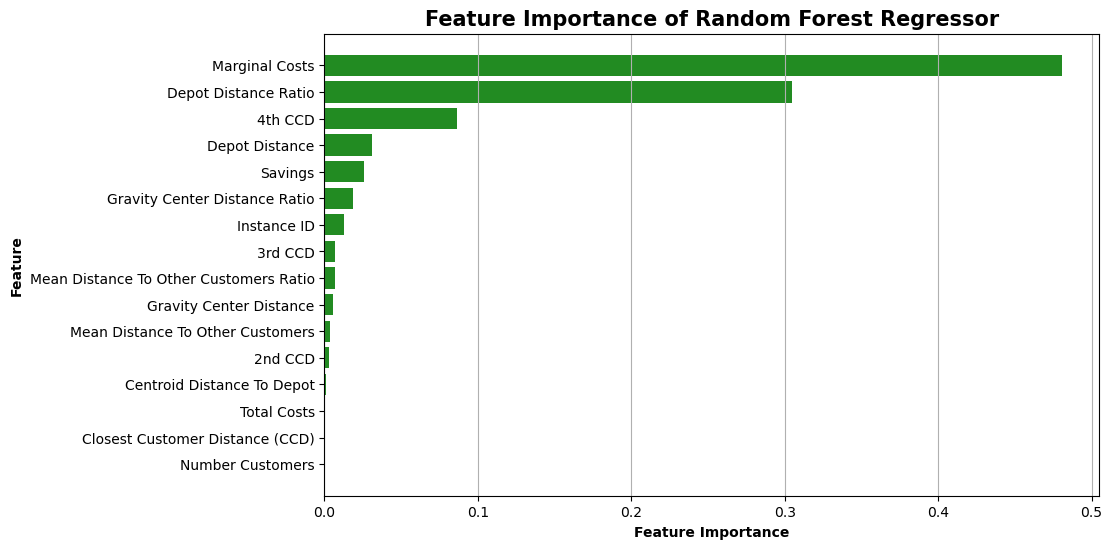

,Instance ID,Number Customers,Depot Distance,Closest Customer Distance (CCD),2nd CCD,3rd CCD,4th CCD,Mean Distance To Other Customers,Gravity Center Distance,Centroid Distance To Depot,Savings,Marginal Costs,Total Costs,Depot Distance Ratio,Mean Distance To Other Customers Ratio,Gravity Center Distance Ratio
69677,7514,13,74.382412,9.328826,11.977744,39.997353,54.165422,51.961210,37.249739,75.853165,4.577470,4.577470,292.824008,1.436450,1.006776,0.998140
34646,4465,10,25.187236,5.800107,24.128578,26.210727,30.255220,36.505248,25.686423,12.202383,2.911537,2.911537,207.726165,0.970934,0.980556,0.998254
86125,8724,14,59.381098,15.401211,41.508458,51.034661,54.656432,68.426798,56.456348,54.652977,14.062999,18.526416,369.615961,1.313578,1.221112,1.457002
82264,8448,14,24.713368,17.196267,17.435241,22.752606,42.408433,57.444244,47.800608,27.018802,21.953203,22.779835,357.896215,0.585547,1.148622,1.394605
53677,6224,12,25.307497,5.802874,20.672112,23.494538,29.873365,47.786737,34.065210,32.783466,5.467586,5.467586,345.700701,0.480132,0.908896,0.941747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,3028,9,39.409196,6.424186,17.933495,28.809265,38.139905,36.320884,14.956833,31.494538,6.300977,6.300977,291.745400,0.882335,0.748210,0.465359
45891,5536,11,34.752013,13.622506,21.530891,24.221070,24.661004,37.724362,8.474908,18.559626,18.449769,18.449769,318.941762,0.794361,0.735322,0.245055
42613,5238,11,74.887159,18.666533,33.682718,35.668402,64.571275,61.856958,45.794846,48.070569,25.877118,25.877118,348.593691,1.159858,1.053047,1.129548
43567,5325,11,91.367357,15.571359,17.349100,23.169903,28.555908,50.318028,39.835148,69.965495,12.209419,12.209419,262.903472,1.536806,1.021288,1.135786


In [6]:
# Create data frame with p-values and scores for all features
df_f_test = pd.DataFrame({'Feature': X_train.columns, 'Scores': select.estimator_.feature_importances_})

# Get selected features only
df_f_test_selection = df_f_test.iloc[select.get_support()]
df_f_test_selection = df_f_test_selection.sort_values(by='Scores')

# Visualize scores of selected features
plt.figure(figsize=(10, 6))
plt.barh(y=df_f_test_selection['Feature'], width=df_f_test_selection['Scores'], color='forestgreen')
plt.xlabel('Feature Importance', size=10, fontweight='bold')
plt.ylabel('Feature', size=10, fontweight='bold')
plt.title('Feature Importance of Random Forest Regressor', size=15, fontweight='bold')
plt.grid(axis='x')
plt.show()

# Display data frame with remaining features
display(X_train[selected_features])

In [7]:
print('Train score with all features:')
fun_train_score(model=LinearRegression(), X_train=X_train, y_train=y_train, cv=10, return_results=False)

print('\nTrain score with selected features:')
fun_train_score(model=LinearRegression(), X_train=X_train_selected, y_train=y_train, cv=10, return_results=False)

Train score with all features:
  CV MAPE train data:  16.267400000000002 %
  CV RMSE train data:  3.2755
  CV computation time: 1 sec

Train score with selected features:
  CV MAPE train data:  16.883 %
  CV RMSE train data:  3.3584
  CV computation time: 0 sec


### **3. Iterative feature selection (recursive feature elimination)**

In [8]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestRegressor(n_estimators=1, random_state=0),
             n_features_to_select=16)

select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

# Show names of selected and not selected features
selected_features = select.get_feature_names_out()
dropped_features = np.array(X_train.columns[~select.get_support()])
print('\nSelected features:\n', selected_features)
print('\nNot selected features:\n', dropped_features)

X_train.shape: (67500, 56)
X_train_selected.shape: (67500, 16)

Selected features:
 ['Instance ID' 'Depot Distance' 'Closest Customer Distance (CCD)'
 '2nd CCD' '3rd CCD' '4th CCD' 'Mean Distance To Other Customers'
 'Gravity Center Distance' 'Centroid Distance To Depot' 'Y Std' 'Savings'
 'Marginal Costs' 'Total Costs' 'Depot Distance Ratio'
 'Mean Distance To Other Customers Ratio' 'Gravity Center Distance Ratio']

Not selected features:
 ['Number Customers' 'X' 'Y' 'X Depot' 'Y Depot' 'Cluster' 'Core Point'
 'Outlier' 'Number Clusters' 'Number Outliers' 'Cluster Size' 'X Centroid'
 'Y Centroid' 'Centroid Distance' 'Distance To Closest Other Cluster'
 'Distance To Closest Other Centroid' 'Cluster Area' 'Cluster Density'
 'X Mean' 'Y Mean' 'X Std' 'X Max' 'Y Max' 'X Min' 'Y Min' 'Correlation'
 'Skewness X' 'Skewness Y' 'Closest Customer Distance (CCD) Ratio'
 '2nd CCD Ratio' '3rd CCD Ratio' '4th CCD Ratio' 'Centroid Distance Ratio'
 'Centroid Distance To Depot Ratio'
 'Distance To Clo

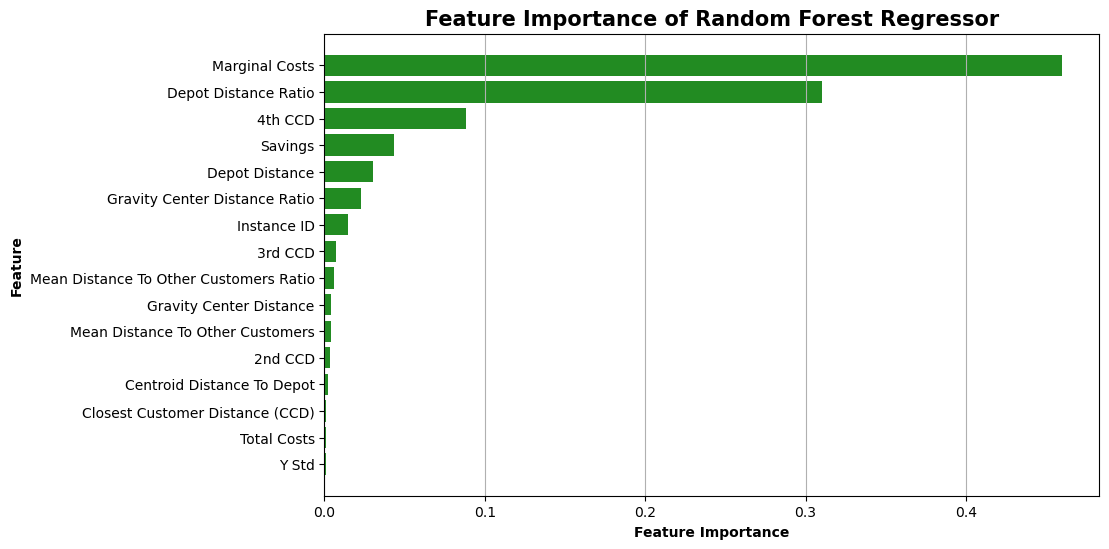

,Instance ID,Depot Distance,Closest Customer Distance (CCD),2nd CCD,3rd CCD,4th CCD,Mean Distance To Other Customers,Gravity Center Distance,Centroid Distance To Depot,Y Std,Savings,Marginal Costs,Total Costs,Depot Distance Ratio,Mean Distance To Other Customers Ratio,Gravity Center Distance Ratio
69677,7514,74.382412,9.328826,11.977744,39.997353,54.165422,51.961210,37.249739,75.853165,27.062338,4.577470,4.577470,292.824008,1.436450,1.006776,0.998140
34646,4465,25.187236,5.800107,24.128578,26.210727,30.255220,36.505248,25.686423,12.202383,19.195561,2.911537,2.911537,207.726165,0.970934,0.980556,0.998254
86125,8724,59.381098,15.401211,41.508458,51.034661,54.656432,68.426798,56.456348,54.652977,25.984878,14.062999,18.526416,369.615961,1.313578,1.221112,1.457002
82264,8448,24.713368,17.196267,17.435241,22.752606,42.408433,57.444244,47.800608,27.018802,25.878807,21.953203,22.779835,357.896215,0.585547,1.148622,1.394605
53677,6224,25.307497,5.802874,20.672112,23.494538,29.873365,47.786737,34.065210,32.783466,25.821655,5.467586,5.467586,345.700701,0.480132,0.908896,0.941747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,3028,39.409196,6.424186,17.933495,28.809265,38.139905,36.320884,14.956833,31.494538,23.226683,6.300977,6.300977,291.745400,0.882335,0.748210,0.465359
45891,5536,34.752013,13.622506,21.530891,24.221070,24.661004,37.724362,8.474908,18.559626,29.899673,18.449769,18.449769,318.941762,0.794361,0.735322,0.245055
42613,5238,74.887159,18.666533,33.682718,35.668402,64.571275,61.856958,45.794846,48.070569,30.720834,25.877118,25.877118,348.593691,1.159858,1.053047,1.129548
43567,5325,91.367357,15.571359,17.349100,23.169903,28.555908,50.318028,39.835148,69.965495,20.382368,12.209419,12.209419,262.903472,1.536806,1.021288,1.135786


In [20]:
# Create data frame with p-values and scores for all features
df_f_test_selection = pd.DataFrame({'Feature': X_train.columns[select.get_support()], 'Scores': select.estimator_.feature_importances_})

# Get selected features only
#df_f_test_selection = df_f_test.iloc[select.get_support()]
df_f_test_selection = df_f_test_selection.sort_values(by='Scores')

# Visualize scores of selected features
plt.figure(figsize=(10, 6))
plt.barh(y=df_f_test_selection['Feature'], width=df_f_test_selection['Scores'], color='forestgreen')
plt.xlabel('Feature Importance', size=10, fontweight='bold')
plt.ylabel('Feature', size=10, fontweight='bold')
plt.title('Feature Importance of Random Forest Regressor', size=15, fontweight='bold')
plt.grid(axis='x')
plt.show()

# Display data frame with remaining features
display(X_train[selected_features])

In [ ]:
print('Train score with all features:')
fun_train_score(model=LinearRegression(), X_train=X_train, y_train=y_train, cv=10, return_results=False)

print('\nTrain score with selected features:')
fun_train_score(model=LinearRegression(), X_train=X_train_selected, y_train=y_train, cv=10, return_results=False)

Train score with all features:
  CV MAPE train data:  16.267400000000002 %
  CV RMSE train data:  3.2755
  CV computation time: 1 sec

Train score with selected features:
  CV MAPE train data:  16.7895 %
  CV RMSE train data:  3.5282
  CV computation time: 0 sec
